# Team Members:

Jetendra Mulinti, Goutham Vemula, Prajeeth Nakka

# Introduction: We are trying create a 6 models & pick a model which predicts the dropout_cnt.

Steps we are following
1. Loading data
2. Cleaning data
3. EDA
4. Feature selection
5. Normalizing the data
6. Train the model with 6 Models
7. Validating Metrics.
8. Selecting Models
9. Conclusion

In [1]:
### Import packages

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import os
from datetime import datetime

### sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

###### Standardization of the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#### Modelling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_poisson_deviance, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import glm

from sklearn.metrics import mean_squared_error


# Data Loading

In [2]:
github_url = 'https://raw.githubusercontent.com/JetendraMulinti/DAV-6150---DataScience/main/Project%201%20Implementing%20and%20Evaluating%20a%20Series%20of%20Regression%20Models/Project1_Data.csv'

NY_df = pd.read_csv(github_url)
NY_df.head(2)

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,63,10%,310,47%,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,30,9%,169,52%,47,15%,2,1%,11,3%,0,0%,65,20%


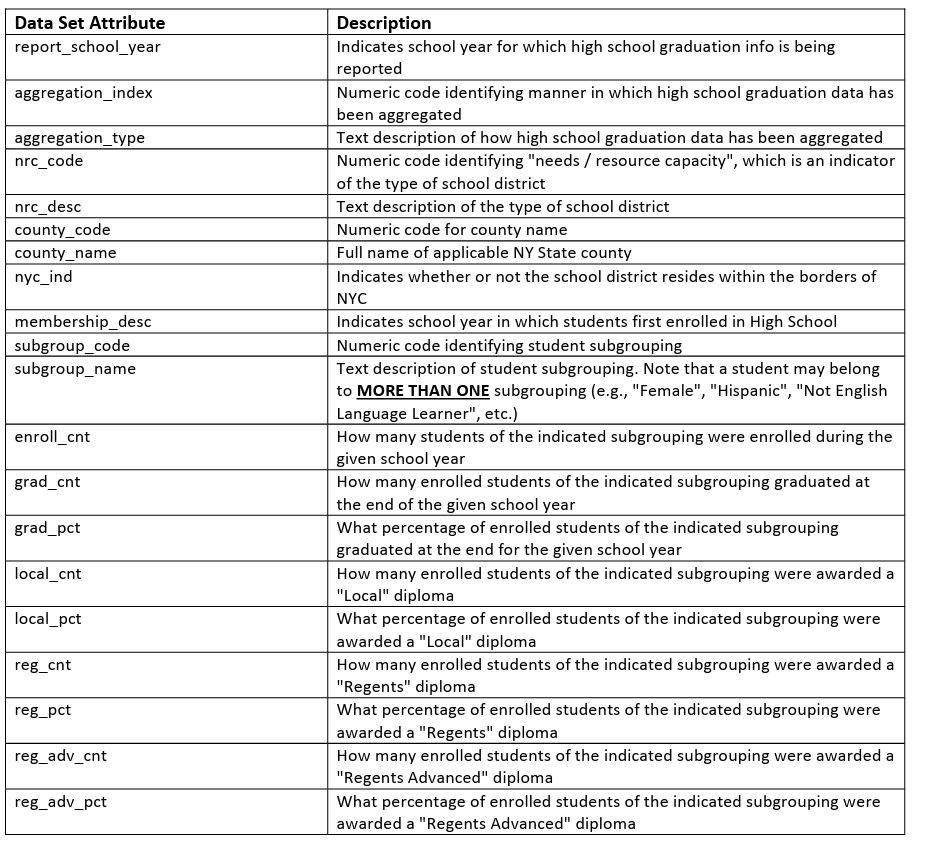

In [35]:
from IPython.display import Image
Image(filename='D:\JITHU\Yeshiva - USA\Academics\Spring - 2024\DATA SCIENCE\DAV 6150 - DataScience\Project 1 Implementing and Evaluating a Series of Regression Models\DataDictionary_1.png')


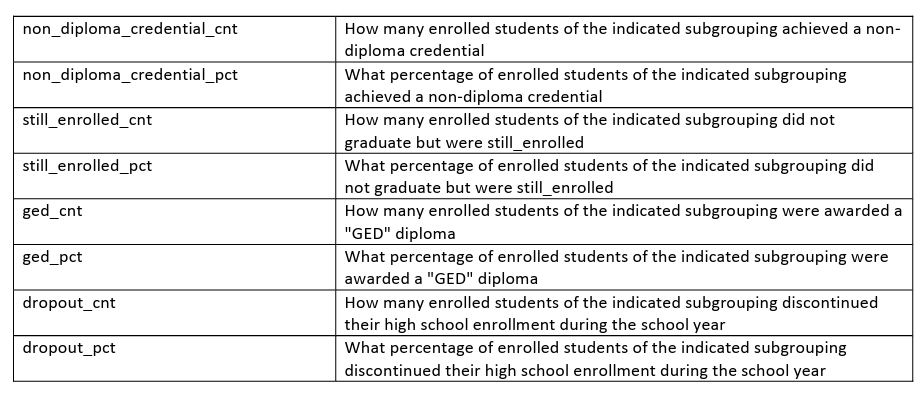

In [36]:
from IPython.display import Image
Image(filename='D:\JITHU\Yeshiva - USA\Academics\Spring - 2024\DATA SCIENCE\DAV 6150 - DataScience\Project 1 Implementing and Evaluating a Series of Regression Models\DataDictionary_2.png')


# Data Cleaning

In [3]:
#### upon oberserving the data in excel we found some rows are having '-' so planning to remove them

print("No of rows with -'s instead of data: ",len(NY_df[NY_df['enroll_cnt'] == '-']))
print(" % of missing data: ",len(NY_df[NY_df['enroll_cnt'] == '-']) / len(NY_df) * 100)

##### removing that data
NY_df = NY_df[NY_df['enroll_cnt'] != '-'].reset_index(drop=True)

print("Post cleaning of data: ",len(NY_df))

No of rows with -'s instead of data:  33478
 % of missing data:  45.76498250218723
Post cleaning of data:  39674


In [4]:
print("Shape of the data: ", NY_df.shape)

Shape of the data:  (39674, 29)


In [5]:
NY_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39674 entries, 0 to 39673
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          39674 non-null  object
 1   aggregation_index           39674 non-null  int64 
 2   aggregation_type            39674 non-null  object
 3   aggregation_name            39674 non-null  object
 4   nrc_code                    39674 non-null  int64 
 5   nrc_desc                    39674 non-null  object
 6   county_code                 39674 non-null  int64 
 7   county_name                 39674 non-null  object
 8   nyc_ind                     39674 non-null  int64 
 9   membership_desc             39674 non-null  object
 10  subgroup_code               39674 non-null  int64 
 11  subgroup_name               39674 non-null  object
 12  enroll_cnt                  39674 non-null  object
 13  grad_cnt                    39674 non-null  ob

In [6]:
####### Converting Data Types as per data

def convert_column_data_types(df):
    
    # Convert 'cnt' columns to int and 'pct' columns to float before that remove % symbol
    for column in df.columns:
        if column.endswith('cnt'):
            df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype(int)
        elif column.endswith('pct'):
            df[column] = df[column].str.replace('%', '').astype(float)
    
    # Convert specific columns based on the suggested data types
    specific_columns = {
        'report_school_year': 'object',
        'aggregation_index': 'int64',
        'aggregation_type': 'object',
        'nrc_code': 'int64',
        'nrc_desc': 'object',
        'county_code': 'int64',
        'county_name': 'object',
        'nyc_ind': 'bool',
        'membership_desc': 'object',
        'subgroup_code': 'int64',
        'subgroup_name': 'object'
    }
    
    for column, dtype in specific_columns.items():
        if column in df.columns:
            if dtype == 'bool':
                df[column] = df[column].astype(bool)
            else:
                df[column] = df[column].astype(dtype)
    
    return df


In [7]:
### Calling functions to change the data types

NY_df =convert_column_data_types(NY_df)

NY_df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,False,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71.0,63,10.0,310,47.0,91,14.0,16,2.0,30,5.0,0,0.0,148,22.0
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,False,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76.0,30,9.0,169,52.0,47,15.0,2,1.0,11,3.0,0,0.0,65,20.0
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,False,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65.0,33,10.0,141,42.0,44,13.0,14,4.0,19,6.0,0,0.0,83,25.0
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,False,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68.0,42,11.0,183,50.0,23,6.0,10,3.0,18,5.0,0,0.0,91,25.0
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,False,2013 Total Cohort - 6 Year Outcome,6,Hispanic,98,58,59.0,13,13.0,40,41.0,5,5.0,4,4.0,8,8.0,0,0.0,28,29.0


In [8]:
NY_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39674 entries, 0 to 39673
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   report_school_year          39674 non-null  object 
 1   aggregation_index           39674 non-null  int64  
 2   aggregation_type            39674 non-null  object 
 3   aggregation_name            39674 non-null  object 
 4   nrc_code                    39674 non-null  int64  
 5   nrc_desc                    39674 non-null  object 
 6   county_code                 39674 non-null  int64  
 7   county_name                 39674 non-null  object 
 8   nyc_ind                     39674 non-null  bool   
 9   membership_desc             39674 non-null  object 
 10  subgroup_code               39674 non-null  int64  
 11  subgroup_name               39674 non-null  object 
 12  enroll_cnt                  39674 non-null  int32  
 13  grad_cnt                    396

# EDA

In [9]:
## Sitation: Help from chatgpt
###### Creating a function that gives univariate analysis on quantitative columns


def Hist_BoxPlotFunction(df, pdf_filename):

    # Path for saving the PDF in the current working directory
    pdf_path = os.path.join(os.getcwd(), pdf_filename)
    
    quantitative_columns = df.select_dtypes(include=['float64', 'int64','int32']).columns
    
    with PdfPages(pdf_path) as pdf:
        for col in quantitative_columns:
            fig, axs = plt.subplots(1, 2, figsize=(12, 4))
            
            # Histogram
            sns.histplot(df[col], ax=axs[0], kde=True)
            axs[0].set_title(f'Histogram of {col}')
            
            # Box Plot
            sns.boxplot(x=df[col], ax=axs[1])
            axs[1].set_title(f'Box Plot of {col}')
            
            plt.tight_layout()
            pdf.savefig(fig)  # Save the figure into the PDF
            plt.show()  # Display the plot
            plt.close(fig)  # Close to free up memory

In [10]:
# def Hist_BoxPlotFunction(df, folder_name):
    
#     # Create a folder with a timestamp to save images uniquely
#     timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
#     folder_path = os.path.join(os.getcwd(), f"{folder_name}_{timestamp}")
#     os.makedirs(folder_path, exist_ok=True)
    
#     quantitative_columns = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
    
#     for col in quantitative_columns:
#         fig, axs = plt.subplots(1, 2, figsize=(12, 4))
        
#         # Histogram
#         sns.histplot(df[col], ax=axs[0], kde=True)
#         axs[0].set_title(f'Histogram of {col}')
        
#         # Box Plot
#         sns.boxplot(x=df[col], ax=axs[1])
#         axs[1].set_title(f'Box Plot of {col}')
        
#         plt.tight_layout()
#         # Save each figure as an image in the newly created folder
#         fig.savefig(os.path.join(folder_path, f"{col}.png"))
#         plt.show()  # Display the plot
#         plt.close(fig)  # Close to free up memory

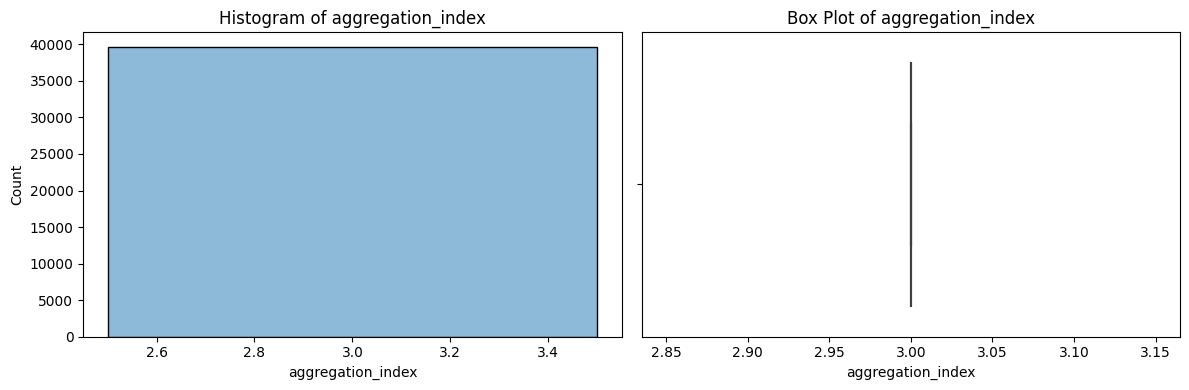

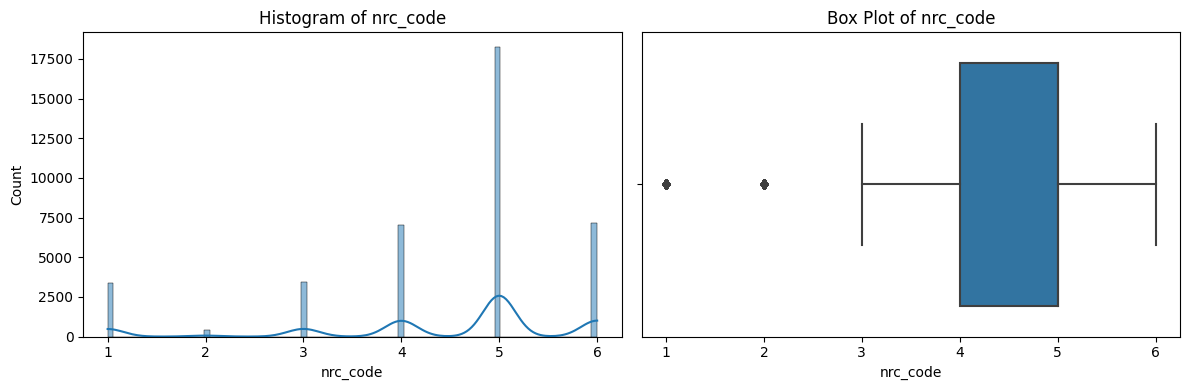

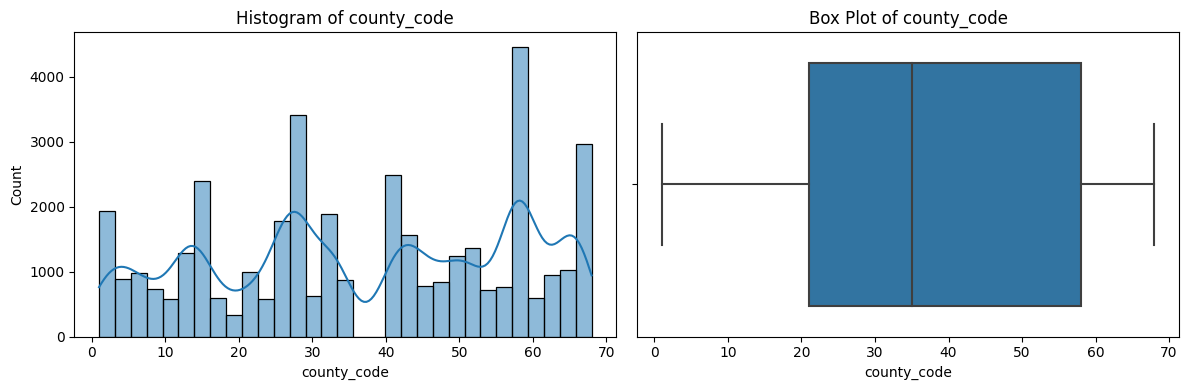

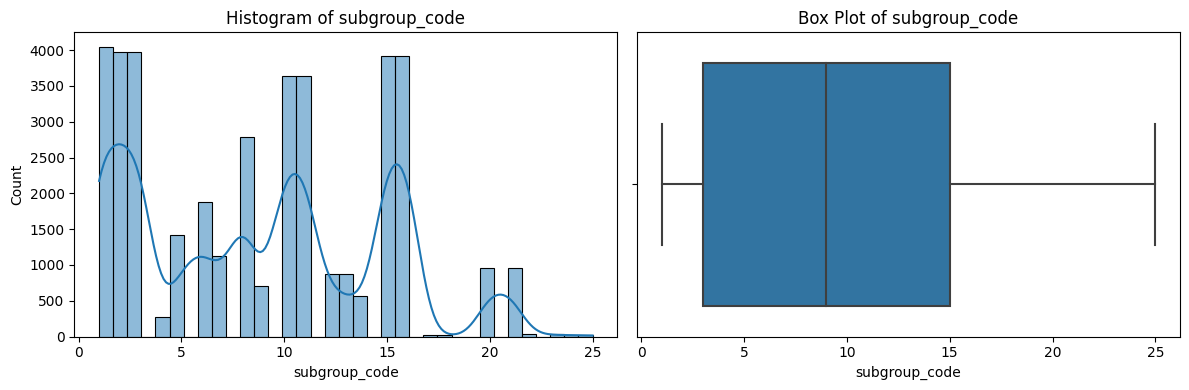

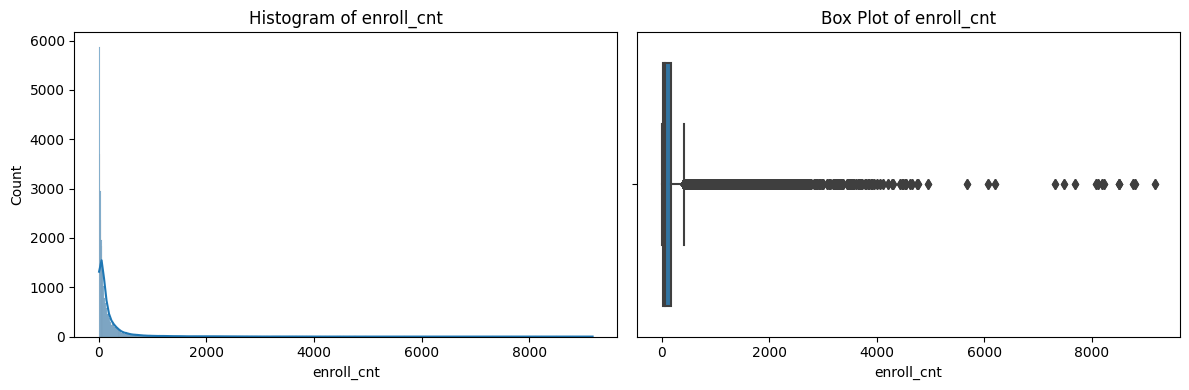

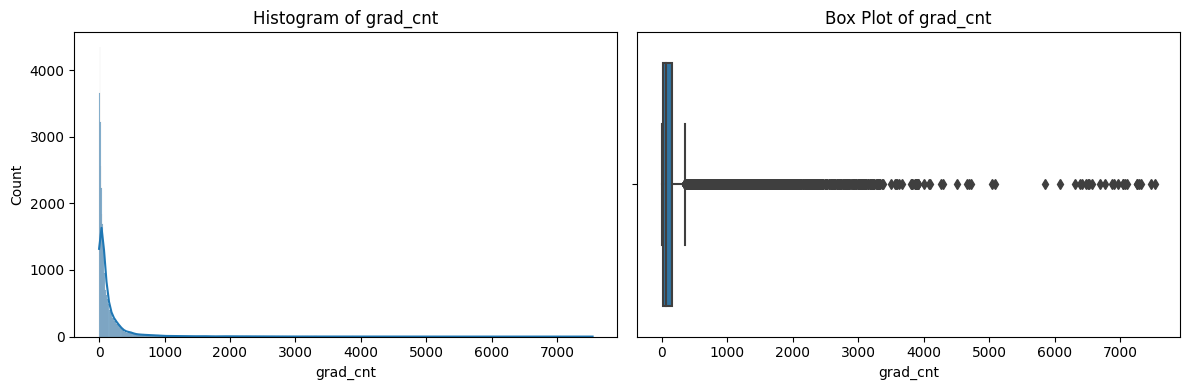

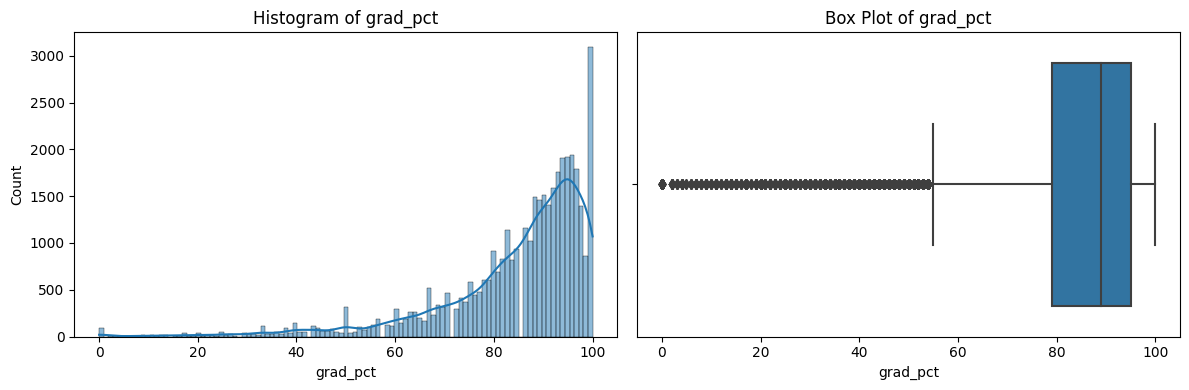

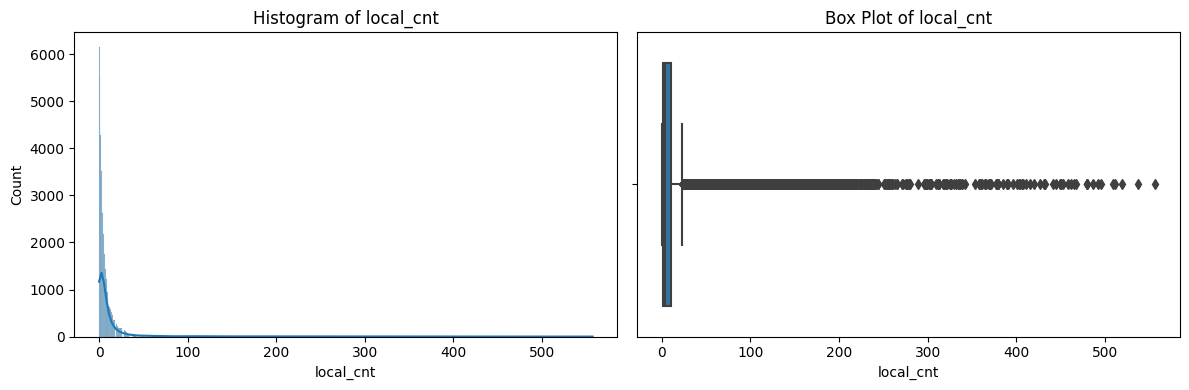

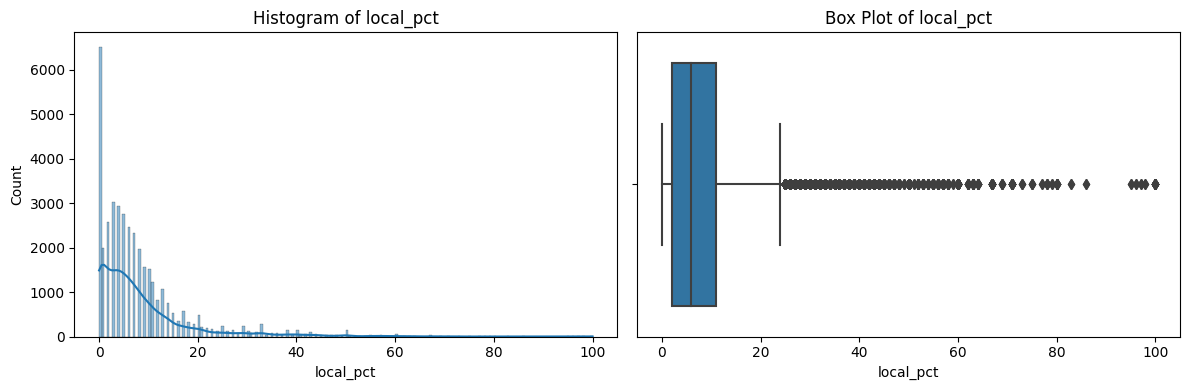

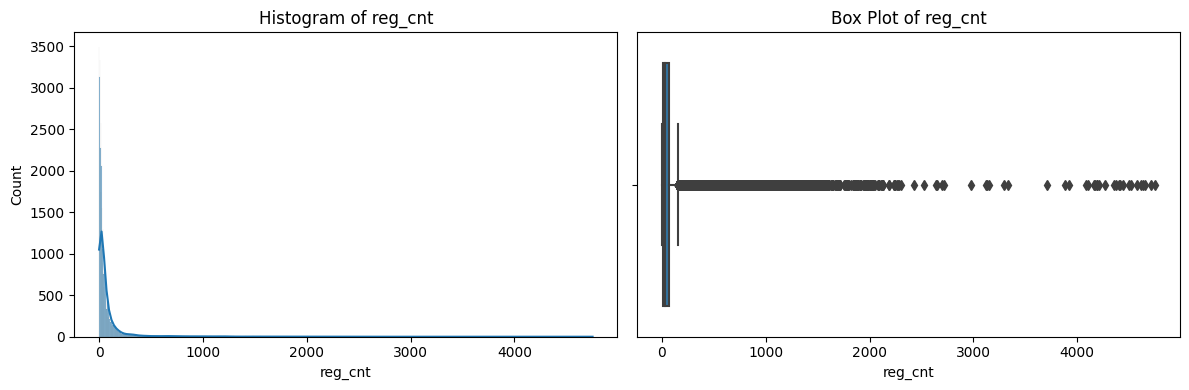

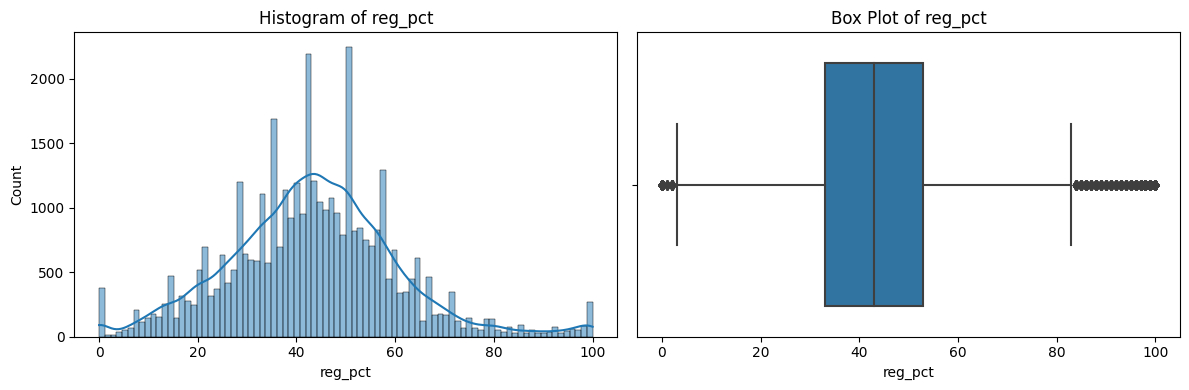

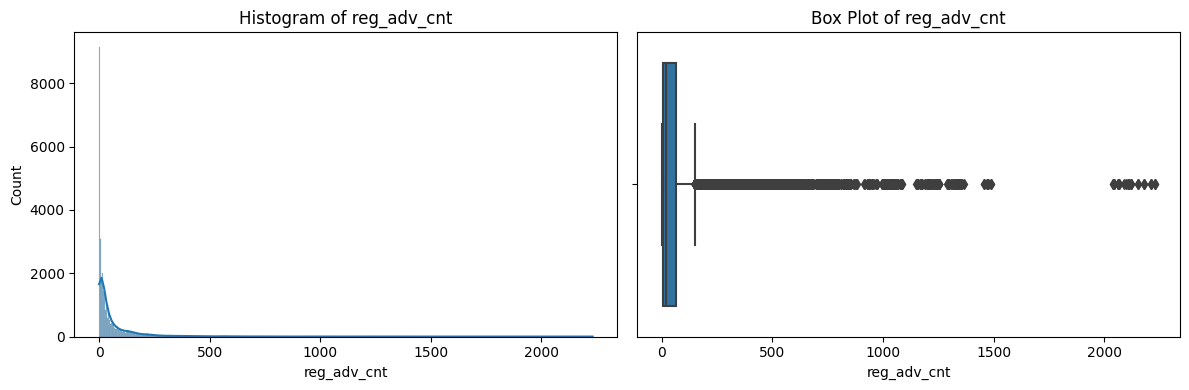

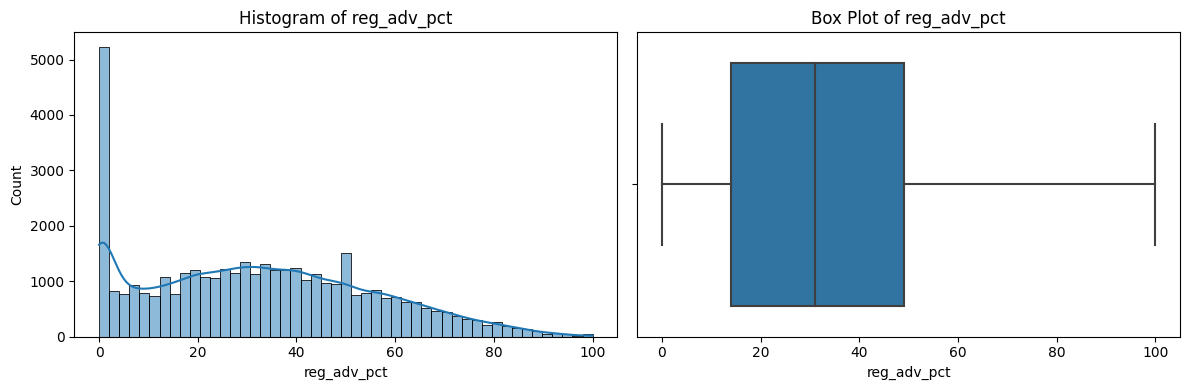

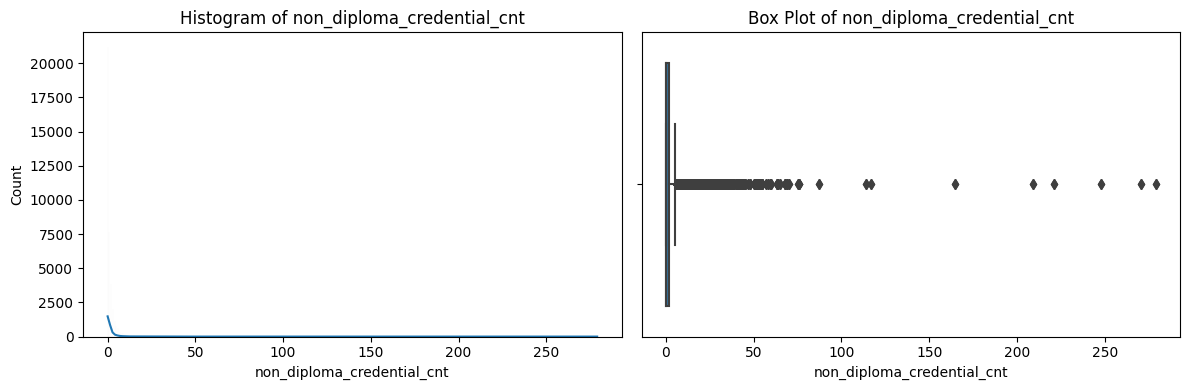

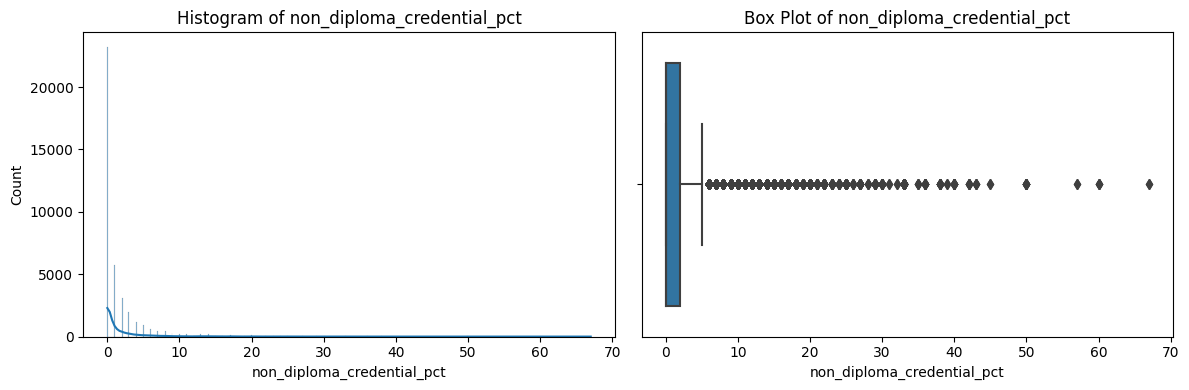

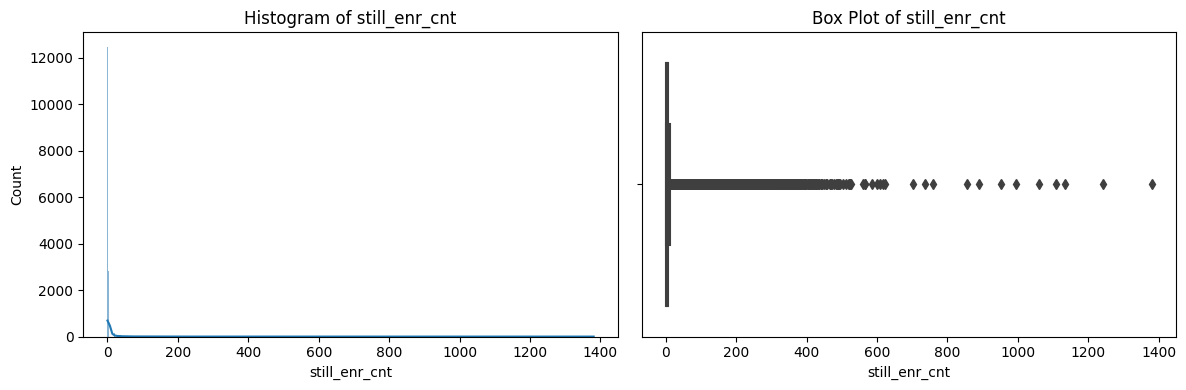

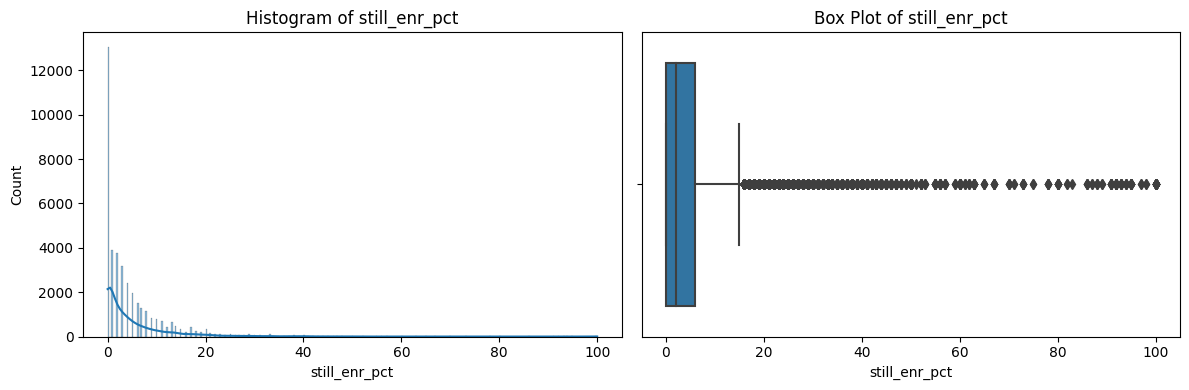

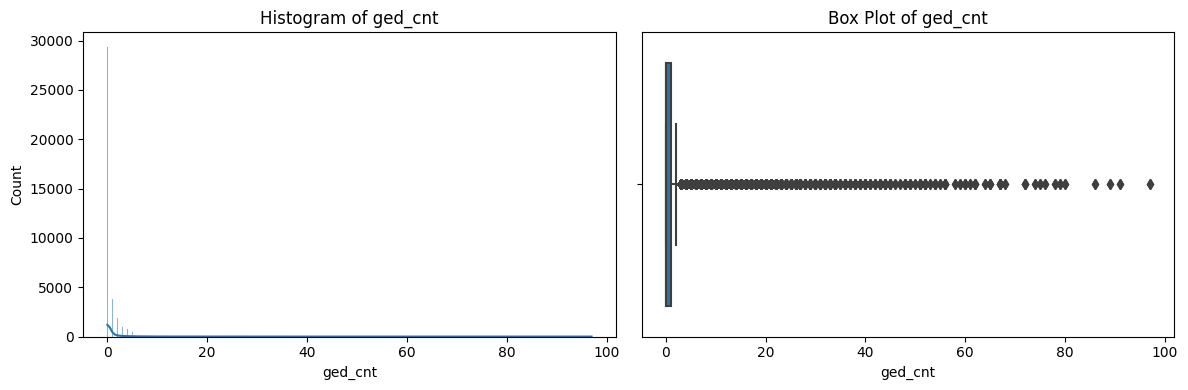

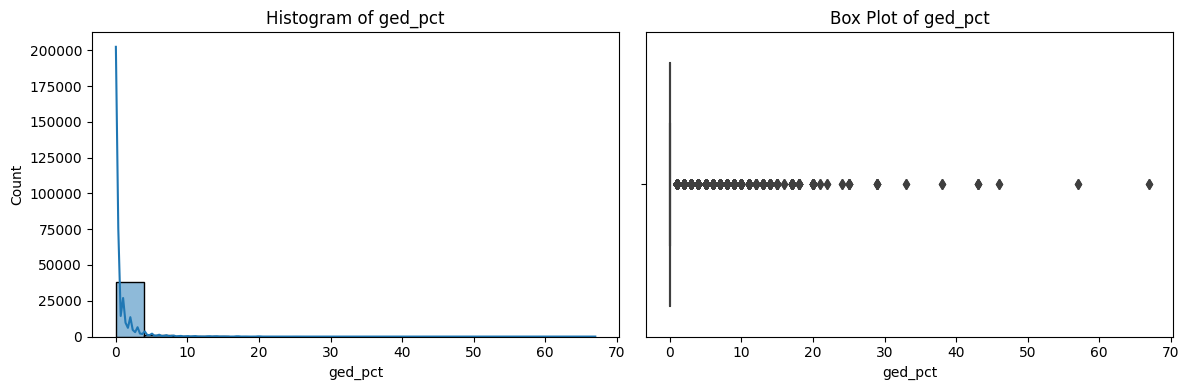

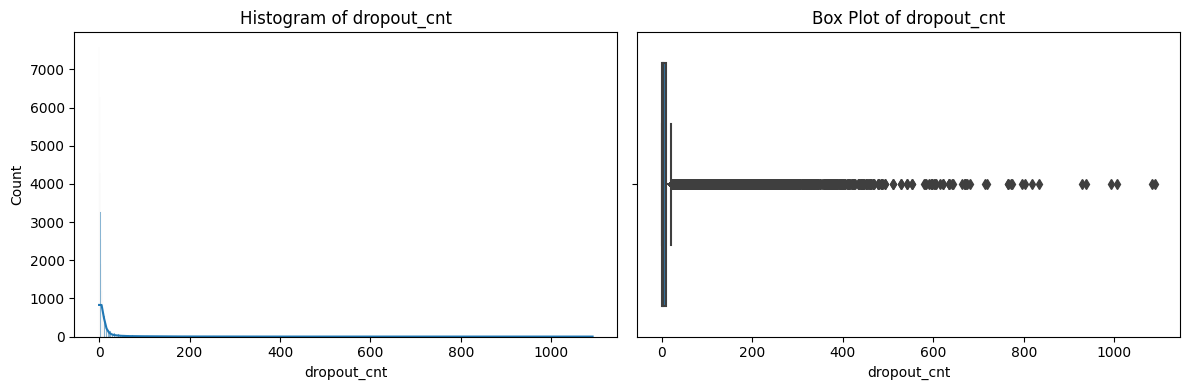

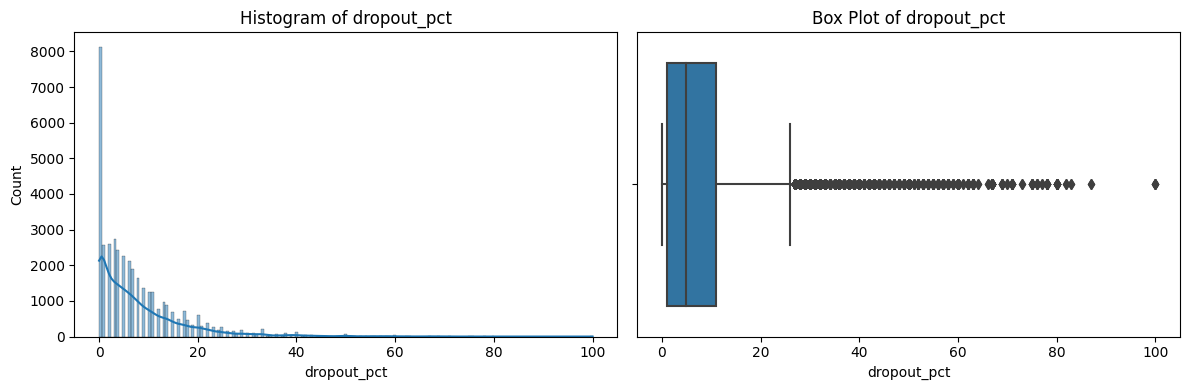

In [11]:
Hist_BoxPlotFunction(NY_df,'Quant_visuals.pdf')

## Observations

1. Distribution shapes vary, with right-skewness in enrollment and graduation counts, indicating many small values and fewer large values.
2. County and subgroup codes show multi-modal distributions, suggesting diverse representation across multiple categories.
3. Graduation-related percentages are left-skewed, most schools have high success rates, while dropout rates are low but varied.
4. Outliers are present in most distributions, indicating extreme values that could be special cases or data entry errors.
5. The data might require transformation for certain statistical analyses or predictive modeling due to skewness and outliers.

In [12]:
#### Capping (For Notmally distributed data)
#### We considered lower_percentile, upper_percentile as default values. 

def cap_outliers(series, lower_percentile=0.05, upper_percentile=0.95):
    """
    Caps outliers in a pandas series to specified percentile thresholds.
    """
    quantiles = series.quantile([lower_percentile, upper_percentile])
    series_capped = series.clip(quantiles[lower_percentile], quantiles[upper_percentile])
    return series_capped



CappingColumns = NY_df.select_dtypes(include=['float64', 'int64', 'int32']).columns.tolist()


# Applying the function to cap outliers in the dataset
for column in CappingColumns:
    NY_df[column] = cap_outliers(NY_df[column])
    
NY_df.head(2)

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,4,ALBANY,False,2013 Total Cohort - 6 Year Outcome,1,All Students,658.0,464,71.0,52,10.0,310,47.0,91.0,14.0,8,2.0,30,5.0,0,0.0,80,22.0
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,4,ALBANY,False,2013 Total Cohort - 6 Year Outcome,2,Female,324.0,246,76.0,30,9.0,169,52.0,47.0,15.0,2,1.0,11,3.0,0,0.0,65,20.0


In [13]:
sum_df = pd.DataFrame(NY_df[['enroll_cnt','grad_cnt','local_cnt','reg_cnt','reg_adv_cnt','non_diploma_credential_cnt',
     'still_enr_cnt','ged_cnt','dropout_cnt']].sum(), columns=['sum']).reset_index()

sum_df = sum_df.sort_values(by='sum', ascending=False)
sum_df['Percent'] = round((sum_df['sum'] / sum_df[sum_df['index'] == 'enroll_cnt']['sum'].sum()) * 100)
sum_df

,index,sum,Percent
0,enroll_cnt,5788558.4,100.0
1,grad_cnt,4963181.0,86.0
3,reg_cnt,2431473.0,42.0
4,reg_adv_cnt,1963913.4,34.0
8,dropout_cnt,422906.0,7.0
2,local_cnt,345251.0,6.0
6,still_enr_cnt,271031.0,5.0
5,non_diploma_credential_cnt,52433.0,1.0
7,ged_cnt,32923.0,1.0


Students obtaining regular (42%) and advanced Regents diplomas (34%), while dropout (7%) and GED attainment (1%) are relatively low.

Here we want to compare the dropouts & grad by category wise, so instead of using plots we are grouping by only for better understanding

In [14]:
def calculate_percentages_and_sort(df, group_by_column, sort_by_column, ascending=False):
    
    temp_df = df.groupby(group_by_column)['enroll_cnt','grad_cnt','dropout_cnt',
                                         'local_cnt','reg_cnt','reg_adv_cnt','non_diploma_credential_cnt',
                                         'still_enr_cnt','ged_cnt'].sum().reset_index()
    
    temp_df['enroll_pct col-lvl %'] = round((temp_df['enroll_cnt'] / temp_df['enroll_cnt'].sum()) * 100, 2)
    
    temp_df['grad_pct %'] = ((temp_df['grad_cnt'] / temp_df['enroll_cnt']) * 100).astype(int)
    temp_df['dropout_pct %'] = ((temp_df['dropout_cnt'] / temp_df['enroll_cnt']) * 100).astype(int)
    temp_df['local_pct %'] = ((temp_df['local_cnt'] / temp_df['enroll_cnt']) * 100).astype(int)
    temp_df['reg_pct %'] = ((temp_df['reg_cnt'] / temp_df['enroll_cnt']) * 100).astype(int)
    temp_df['reg_adv_pct %'] = ((temp_df['reg_adv_cnt'] / temp_df['enroll_cnt']) * 100).astype(int)
    temp_df['non_diploma_credential_cnt_pct %'] = ((temp_df['non_diploma_credential_cnt'] / temp_df['enroll_cnt']) * 100).astype(int)
    temp_df['still_enr_pct %'] = ((temp_df['still_enr_cnt'] / temp_df['enroll_cnt']) * 100).astype(int)
    temp_df['ged_cnt %'] = ((temp_df['ged_cnt'] / temp_df['enroll_cnt']) * 100).astype(int)

    ## ordering columns
    temp_df = temp_df[[group_by_column,'enroll_cnt','enroll_pct col-lvl %','grad_pct %','dropout_pct %','local_pct %',
                       'reg_pct %','reg_adv_pct %','non_diploma_credential_cnt_pct %','still_enr_pct %','ged_cnt %']]

    
    temp_df = temp_df.sort_values(by=[sort_by_column], ascending=ascending).reset_index(drop=True)
    return temp_df


In [15]:
### County_name wise (dropout_pct%)
calculate_percentages_and_sort(NY_df, group_by_column='county_name', sort_by_column='dropout_pct %', ascending=False)

,county_name,enroll_cnt,enroll_pct col-lvl %,grad_pct %,dropout_pct %,local_pct %,reg_pct %,reg_adv_pct %,non_diploma_credential_cnt_pct %,still_enr_pct %,ged_cnt %
0,MONTGOMERY,19480.0,0.34,77,14,7,45,24,1,6,0
1,CHEMUNG,25922.0,0.45,77,14,6,36,35,0,4,1
2,FULTON,18078.0,0.31,79,13,6,47,24,2,4,0
3,YATES,5792.0,0.10,83,12,5,47,31,1,2,0
4,BRONX,303195.0,5.24,78,12,7,44,12,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...
57,SUFFOLK,735685.1,12.71,89,4,5,37,43,0,3,0
58,HAMILTON,382.0,0.01,91,3,12,50,28,0,2,0
59,GENESEE,17216.0,0.30,92,3,6,49,35,0,2,0
60,NASSAU,577296.6,9.97,90,3,4,31,48,0,3,0


In [16]:
### County_name wise 
calculate_percentages_and_sort(NY_df, group_by_column='county_name', sort_by_column='grad_pct %', ascending=False)

,county_name,enroll_cnt,enroll_pct col-lvl %,grad_pct %,dropout_pct %,local_pct %,reg_pct %,reg_adv_pct %,non_diploma_credential_cnt_pct %,still_enr_pct %,ged_cnt %
0,PUTNAM,40738.0,0.70,93,2,5,39,48,0,2,0
1,GENESEE,17216.0,0.30,92,3,6,49,35,0,2,0
2,SCHUYLER,4036.0,0.07,92,4,9,57,25,1,1,0
3,WYOMING,8444.0,0.15,92,4,7,47,37,0,1,0
4,ESSEX,6498.0,0.11,91,5,7,47,36,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
57,KINGS,512429.1,8.85,78,11,7,45,17,0,7,0
58,SCHENECTADY,61174.9,1.06,78,9,6,41,29,1,5,0
59,BRONX,303195.0,5.24,78,12,7,44,12,0,7,0
60,MONTGOMERY,19480.0,0.34,77,14,7,45,24,1,6,0


1. Dropout Rates Insight: It tells counties sorted by 'dropout_pct' in descending order, revealing that Montgomery has the highest reported dropout rate.

2. Graduation Rates Insight: It tells counties by 'grad_pct' in descending order, highlighting that Putnam not only has the highest graduation rate but also one of the lowest dropout rates.

3. Data Spread Observation: The data provided spans a diverse range of dropout and graduation percentages across different counties, which can be critical for identifying factors influencing these metrics.

# nrc_desc

In [17]:
### nrc_desc wise (dropout_pct%)
calculate_percentages_and_sort(NY_df, group_by_column='nrc_desc', sort_by_column='dropout_pct %', ascending=False)

,nrc_desc,enroll_cnt,enroll_pct col-lvl %,grad_pct %,dropout_pct %,local_pct %,reg_pct %,reg_adv_pct %,non_diploma_credential_cnt_pct %,still_enr_pct %,ged_cnt %
0,Urban-Suburban High Needs,632957.4,10.93,75,12,7,48,19,1,7,0
1,Buffalo Rochester Yonkers Syracuse,194188.6,3.35,78,11,7,44,16,1,7,0
2,NYC,1519180.8,26.24,79,11,7,45,20,0,7,0
3,Rural High Needs,343720.0,5.94,85,9,8,47,29,1,3,0
4,Average Needs,2070142.9,35.76,89,4,5,40,42,0,3,0
5,Low Needs,1028368.7,17.77,94,1,3,34,51,0,2,0


In [18]:
### nrc_desc wise (grad_pct%)
calculate_percentages_and_sort(NY_df, group_by_column='nrc_desc', sort_by_column='grad_pct %', ascending=False)

,nrc_desc,enroll_cnt,enroll_pct col-lvl %,grad_pct %,dropout_pct %,local_pct %,reg_pct %,reg_adv_pct %,non_diploma_credential_cnt_pct %,still_enr_pct %,ged_cnt %
0,Low Needs,1028368.7,17.77,94,1,3,34,51,0,2,0
1,Average Needs,2070142.9,35.76,89,4,5,40,42,0,3,0
2,Rural High Needs,343720.0,5.94,85,9,8,47,29,1,3,0
3,NYC,1519180.8,26.24,79,11,7,45,20,0,7,0
4,Buffalo Rochester Yonkers Syracuse,194188.6,3.35,78,11,7,44,16,1,7,0
5,Urban-Suburban High Needs,632957.4,10.93,75,12,7,48,19,1,7,0


1. "Urban-Suburban High Needs" areas show a notable combination of high dropout rates (12%) and lower graduation rates (75%) compared to other areas.
2. "Low Needs" areas display the highest graduation rates (94%) and the lowest dropout rates (1%), indicating a strong performance in these regions.
3. There is a clear contrast in educational outcomes based on the need level of the area, with "High Needs" areas struggling more with dropouts and lower graduation rates.

# subgroup_name

In [19]:
### subgroup_name wise (dropout_pct%)
calculate_percentages_and_sort(NY_df, group_by_column='subgroup_name', sort_by_column='dropout_pct %', ascending=False)

,subgroup_name,enroll_cnt,enroll_pct col-lvl %,grad_pct %,dropout_pct %,local_pct %,reg_pct %,reg_adv_pct %,non_diploma_credential_cnt_pct %,still_enr_pct %,ged_cnt %
0,Migrant,126.0,0.00,71,30,6,33,1,1,15,0
1,English Language Learner,61496.0,1.06,39,27,12,24,1,2,15,1
2,Homeless,41960.0,0.72,62,21,8,44,8,1,11,1
3,In Foster Care,296.0,0.01,66,20,16,33,3,8,12,0
4,American Indian/Alaska Native,5768.0,0.10,72,15,6,48,17,1,8,1
5,Students with Disabilities,186496.2,3.22,63,12,21,31,3,4,11,0
6,Hispanic,215182.6,3.72,80,11,7,47,20,0,6,0
7,Black,174785.1,3.02,79,10,8,50,13,1,7,0
8,Economically Disadvantaged,408455.2,7.06,82,10,8,47,22,1,5,0
9,Parent Not in Armed Forces,4510.0,0.08,83,10,6,40,36,1,3,0


In [20]:
### subgroup_name wise (grad_pct%)
calculate_percentages_and_sort(NY_df, group_by_column='subgroup_name', sort_by_column='grad_pct %', ascending=False)

,subgroup_name,enroll_cnt,enroll_pct col-lvl %,grad_pct %,dropout_pct %,local_pct %,reg_pct %,reg_adv_pct %,non_diploma_credential_cnt_pct %,still_enr_pct %,ged_cnt %
0,Parent in Armed Forces,1142.0,0.02,95,2,4,57,33,0,1,0
1,White,503518.0,8.70,90,4,4,38,45,0,2,0
2,Not Economically Disadvantaged,560175.0,9.68,90,4,4,37,45,0,3,0
3,General Education Students,755259.4,13.05,90,5,2,42,41,0,2,0
4,Formerly English Language Learner,32256.0,0.56,89,4,7,65,16,0,4,0
5,Female,493665.1,8.53,89,6,5,41,39,0,3,0
6,Asian/Pacific Islander,93097.3,1.61,88,5,2,36,44,0,3,0
7,All Students,863223.8,14.91,87,6,5,41,36,0,3,0
8,Not English Language Learner,409669.9,7.08,86,6,6,43,31,0,5,0
9,Male,517640.0,8.94,85,7,6,43,32,1,5,0


1. The group "Migrant" shows the lowest enrollment percentage but has a high dropout rate, suggesting targeted interventions could be needed.
2. "Students with Disabilities" have the lowest graduation rate and a high dropout rate, indicating potential areas for support and resource allocation.
3. "Not Economically Disadvantaged" and "White" subgroups have among the highest graduation rates, suggesting socioeconomic factors may influence educational outcomes significantly.

# aggregation_name

In [21]:
### aggregation_name wise (dropout_pct%)
calculate_percentages_and_sort(NY_df, group_by_column='aggregation_name', sort_by_column='dropout_pct %', ascending=False)

,aggregation_name,enroll_cnt,enroll_pct col-lvl %,grad_pct %,dropout_pct %,local_pct %,reg_pct %,reg_adv_pct %,non_diploma_credential_cnt_pct %,still_enr_pct %,ged_cnt %
0,GREENBURGH ELEVEN UNION FREE SCHOOL DISTRICT,72.0,0.00,55,47,23,22,0,2,15,0
1,GEORGE JUNIOR REPUBLIC UNION FREE SCHOOL DISTRICT,104.0,0.00,59,42,19,23,0,7,3,0
2,POUGHKEEPSIE CITY SCHOOL DISTRICT,13052.0,0.23,59,26,7,42,8,1,10,0
3,KIRYAS JOEL VILLAGE UNION FREE SCHOOL DISTRICT,32.0,0.00,62,25,0,25,0,25,43,0
4,ROOSEVELT UNION FREE SCHOOL DISTRICT,10986.0,0.19,71,21,11,53,6,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...
672,KEENE CENTRAL SCHOOL DISTRICT,168.0,0.00,98,0,0,29,69,0,0,0
673,THREE VILLAGE CENTRAL SCHOOL DISTRICT,19286.0,0.33,97,0,2,26,49,0,1,0
674,LANCASTER CENTRAL SCHOOL DISTRICT,14716.0,0.25,96,0,1,37,53,0,2,0
675,SYOSSET CENTRAL SCHOOL DISTRICT,16992.0,0.29,97,0,0,13,61,0,1,0


In [22]:
### aggregation_name wise (grad_pct%)
calculate_percentages_and_sort(NY_df, group_by_column='aggregation_name', sort_by_column='grad_pct %', ascending=False)

,aggregation_name,enroll_cnt,enroll_pct col-lvl %,grad_pct %,dropout_pct %,local_pct %,reg_pct %,reg_adv_pct %,non_diploma_credential_cnt_pct %,still_enr_pct %,ged_cnt %
0,BLIND BROOK-RYE UNION FREE SCHOOL DISTRICT,2952.0,0.05,99,0,1,98,0,0,0,0
1,SCARSDALE UNION FREE SCHOOL DISTRICT,9302.0,0.16,99,0,0,95,0,0,0,0
2,MANHASSET UNION FREE SCHOOL DISTRICT,9166.0,0.16,99,0,1,12,85,0,0,0
3,CLYMER CENTRAL SCHOOL DISTRICT,666.0,0.01,99,0,14,30,54,0,0,0
4,BYRAM HILLS CENTRAL SCHOOL DISTRICT,6322.0,0.11,99,0,1,98,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
672,GREENBURGH-GRAHAM UNION FREE SCHOOL DISTRICT,86.0,0.00,58,4,0,23,0,0,86,0
673,GREENBURGH ELEVEN UNION FREE SCHOOL DISTRICT,72.0,0.00,55,47,23,22,0,2,15,0
674,NEW YORK CITY GEOGRAPHIC DISTRICT #23,25092.0,0.43,53,17,10,40,1,1,11,0
675,HEMPSTEAD UNION FREE SCHOOL DISTRICT,24084.0,0.42,51,14,6,37,8,0,14,1


1. The George Junior Republic Union Free School District has the highest dropout rate at 42%, indicating a potential area for intervention and support.
2. The Blind Brook-Rye Union Free School District and Scarsdale Union Free School District are tied for the highest graduation rate at 99%, showcasing exemplary educational outcomes.
3. Mount Pleasant-Cottage Union Free School District stands out with a low graduation rate of 20% and a high dropout rate of 33%, suggesting critical educational challenges.

# nyc_ind

In [23]:
### nyc_ind wise (dropout_pct%)
calculate_percentages_and_sort(NY_df, group_by_column='nyc_ind', sort_by_column='dropout_pct %', ascending=False)

,nyc_ind,enroll_cnt,enroll_pct col-lvl %,grad_pct %,dropout_pct %,local_pct %,reg_pct %,reg_adv_pct %,non_diploma_credential_cnt_pct %,still_enr_pct %,ged_cnt %
0,True,1519180.8,26.24,79,11,7,45,20,0,7,0
1,False,4269377.6,73.76,87,5,5,40,38,0,3,0


In [24]:
### nyc_ind wise (grad_pct%)
calculate_percentages_and_sort(NY_df, group_by_column='nyc_ind', sort_by_column='grad_pct %', ascending=False)

,nyc_ind,enroll_cnt,enroll_pct col-lvl %,grad_pct %,dropout_pct %,local_pct %,reg_pct %,reg_adv_pct %,non_diploma_credential_cnt_pct %,still_enr_pct %,ged_cnt %
0,False,4269377.6,73.76,87,5,5,40,38,0,3,0
1,True,1519180.8,26.24,79,11,7,45,20,0,7,0


1. NYC schools have a lower graduation rate (79%) and higher dropout rate (11%) compared to non-NYC schools.
2. Non-NYC schools perform better with a higher graduation rate (87%) and a lower dropout rate (5%).

# Feature selection

In [25]:
####### I am using correlation matrix for identifying independent columns to dependent columns

def plot_correlation_matrix(df, columns):

    # Select the desired columns from the DataFrame
    selected_df = df[columns]

    # Calculate the correlation matrix
    corr_matrix = selected_df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 15))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    # Set the x-axis and y-axis labels to the selected columns
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.xlabel("Columns")
    plt.ylabel("Columns")

    plt.show()

Here we are removing Percentage columns as it is similar to count column

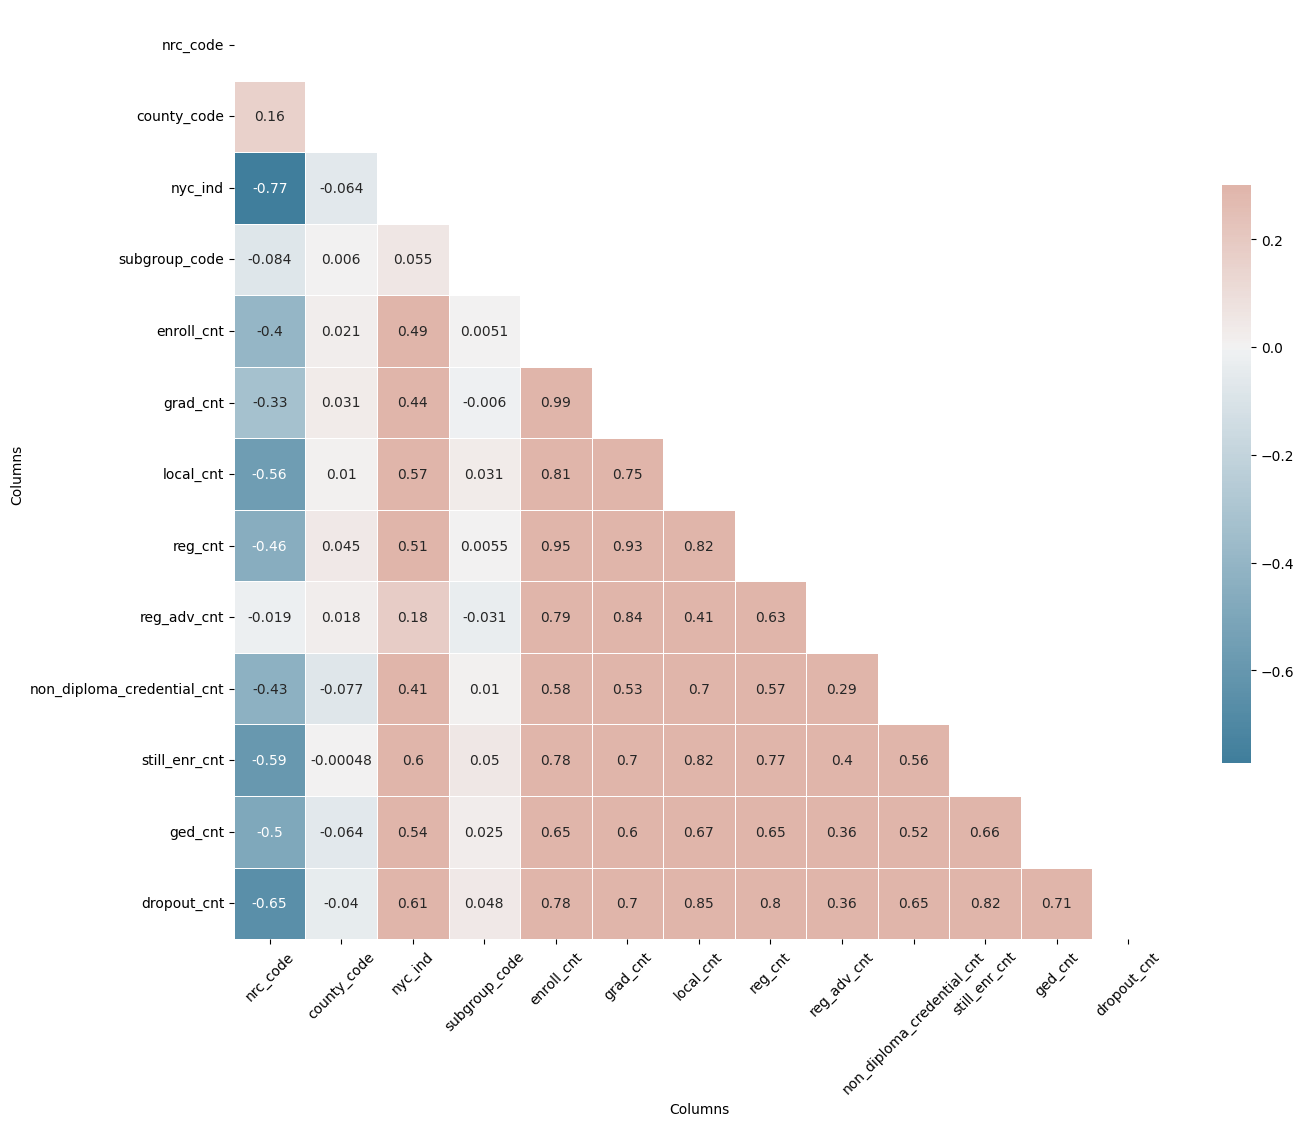

In [26]:
columns_to_analyze = ['nrc_code', 'county_code', "nyc_ind",'subgroup_code','enroll_cnt', 'grad_cnt', 'local_cnt',
       'reg_cnt', 'reg_adv_cnt',
       'non_diploma_credential_cnt',
       'still_enr_cnt', 'ged_cnt', 'dropout_cnt']
plot_correlation_matrix(NY_df, columns_to_analyze)

1. There is a strong negative correlation between NYC indicator (nyc_ind) and dropout count (dropout_cnt), suggesting that being in NYC is inversely related to dropout rates.
2. Enrollment count (enroll_cnt) and graduation count (grad_cnt) are highly positively correlated with one another, indicating that as enrollment increases, graduation counts tend to increase as well.
3. There is also a significant negative correlation between local diploma count (local_cnt) and dropout count (dropout_cnt), which could imply that higher achievement in local diplomas is associated with lower dropout rates.

Considering the above correlation matrix & multicollinearity concept we are picking

1. grad_cnt
2. local_cnt
3. reg_cnt
4. still_enr_cnt
5. ged_cnt
6. nyc_ind

# Poisson Models

In [27]:
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_poisson_deviance, mean_squared_error, r2_score

# Assuming NY_df is your dataframe and already loaded with appropriate data

# Define two different subsets of features for each model
features_model_1 = ['local_cnt', 'still_enr_cnt','grad_cnt',]
features_model_2 = [ 'reg_cnt', 'ged_cnt','nyc_ind']
target = 'dropout_cnt'

# Split the data into training and testing sets (70% train, 30% test) for both models
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    NY_df[features_model_1], NY_df[target], test_size=0.3, random_state=42)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    NY_df[features_model_2], NY_df[target], test_size=0.3, random_state=42)

# Create and train Poisson regression model 1
poisson_model_1 = PoissonRegressor()
poisson_model_1.fit(X_train_1, y_train_1)

# Create and train Poisson regression model 2
poisson_model_2 = PoissonRegressor()
poisson_model_2.fit(X_train_2, y_train_2)

# Predicting the dropout counts using the test set for both models
y_pred_model_1 = poisson_model_1.predict(X_test_1)
y_pred_model_2 = poisson_model_2.predict(X_test_2)

# Calculating the mean Poisson deviance for both models
mpd_model_1 = mean_poisson_deviance(y_test_1, y_pred_model_1)
mpd_model_2 = mean_poisson_deviance(y_test_2, y_pred_model_2)

# Calculating the mean squared error for both models
mse_model_1 = mean_squared_error(y_test_1, y_pred_model_1)
mse_model_2 = mean_squared_error(y_test_2, y_pred_model_2)

# Calculating the R^2 score for both models
r2_model_1 = r2_score(y_test_1, y_pred_model_1)
r2_model_2 = r2_score(y_test_2, y_pred_model_2)

# Printing out the evaluation metrics for both models
print(f'Poisson Model 1 - Mean Poisson Deviance: {mpd_model_1}, Mean Squared Error: {mse_model_1}, R^2 Score: {r2_model_1}')
print(f'Poisson Model 2 - Mean Poisson Deviance: {mpd_model_2}, Mean Squared Error: {mse_model_2}, R^2 Score: {r2_model_2}')


Poisson Model 1 - Mean Poisson Deviance: 7.155004264855494, Mean Squared Error: 117.15808024860074, R^2 Score: 0.6903171330073989
Poisson Model 2 - Mean Poisson Deviance: 8.101178183910715, Mean Squared Error: 132.58021304307943, R^2 Score: 0.649551952417204


Mean Poisson Deviance measures the goodness of fit of the model. A lower mean Poisson deviance indicates a better fit to the data. Model 1 has a lower mean Poisson deviance, which is better.

Mean Squared Error (MSE) is the average of the squares of the errors between the predicted and actual values. A lower MSE indicates a more accurate model. Model 1 has a lower MSE, which is better.

R² Score indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² Score closer to 1 indicates a model that explains a higher proportion of the variance. Model 1 has a higher R² Score, which is better.

Model 1 is the better model as it has a lower Mean Poisson Deviance, a lower Mean Squared Error, and a higher R² Score compared to Model 2. This suggests that Model 1 fits the data better and has a higher predictive accuracy.

# Negative binomial regression models

In [28]:


# Assuming NY_df is your dataframe and already loaded with appropriate data

# Define the two different subsets of features for each model as formulas
formula_glm_model_1 = 'dropout_cnt ~ enroll_cnt + local_cnt + still_enr_cnt'
formula_glm_model_2 = 'dropout_cnt ~ reg_cnt + ged_cnt'

# Split the data into training and testing sets (70% train, 30% test) for both models
train_data, test_data = train_test_split(NY_df, test_size=0.3, random_state=42)

# Define and fit the models
glm_model_1 = glm(formula_glm_model_1, data=train_data, family=sm.families.NegativeBinomial()).fit()
glm_model_2 = glm(formula_glm_model_2, data=train_data, family=sm.families.NegativeBinomial()).fit()

# Make predictions on the test data
y_pred_glm_model_1 = glm_model_1.predict(test_data)
y_pred_glm_model_2 = glm_model_2.predict(test_data)


# Calculating the mean Poisson deviance for both models
mpd_model_1 = mean_poisson_deviance(y_test_1, y_pred_glm_model_1)
mpd_model_2 = mean_poisson_deviance(y_test_2, y_pred_glm_model_2)

# Calculating the mean squared error for both models
mse_model_1 = mean_squared_error(y_test_1, y_pred_glm_model_1)
mse_model_2 = mean_squared_error(y_test_2, y_pred_glm_model_2)

# Calculating the R^2 score for both models
r2_model_1 = r2_score(y_test_1, y_pred_glm_model_1)
r2_model_2 = r2_score(y_test_2, y_pred_glm_model_2)

# Printing out the evaluation metrics for both models
print(f'NegativeBinomial Model 1 - Mean Poisson Deviance: {mpd_model_1}, Mean Squared Error: {mse_model_1}, R^2 Score: {r2_model_1}')
print(f'NegativeBinomial Model 2 - Mean Poisson Deviance: {mpd_model_2}, Mean Squared Error: {mse_model_2}, R^2 Score: {r2_model_2}')

NegativeBinomial Model 1 - Mean Poisson Deviance: 11.152046960940382, Mean Squared Error: 850.9829563239891, R^2 Score: -1.2493953564026565
NegativeBinomial Model 2 - Mean Poisson Deviance: 11.197663365337851, Mean Squared Error: 625.3087125505009, R^2 Score: -0.6528727207477789


# Multiple linear regression

In [29]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming NY_df is your dataframe and already loaded with appropriate data

# Define two different subsets of features for each model
features_model_1 = ['local_cnt', 'still_enr_cnt', 'grad_cnt']
features_model_2 = ['reg_cnt', 'ged_cnt', 'nyc_ind','enroll_cnt']
target = 'dropout_cnt'

# Split the data into training and testing sets (70% train, 30% test) for both models
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    NY_df[features_model_1], NY_df[target], test_size=0.3, random_state=42)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    NY_df[features_model_2], NY_df[target], test_size=0.3, random_state=42)

# Create and train multiple linear regression models
linear_model_1 = LinearRegression()
linear_model_1.fit(X_train_1, y_train_1)

linear_model_2 = LinearRegression()
linear_model_2.fit(X_train_2, y_train_2)

# Predicting dropout counts using the test set for both models
y_pred_model_1 = linear_model_1.predict(X_test_1)
y_pred_model_2 = linear_model_2.predict(X_test_2)

# Calculating the mean squared error for both models
mse_model_1 = mean_squared_error(y_test_1, y_pred_model_1)
mse_model_2 = mean_squared_error(y_test_2, y_pred_model_2)

# Calculating the R-squared score for both models
r2_model_1 = r2_score(y_test_1, y_pred_model_1)
r2_model_2 = r2_score(y_test_2, y_pred_model_2)

# Printing out the evaluation metrics for both models
print(f'Linear Regression Model 1 (Features: {features_model_1})')
print(f'\tMean Squared Error: {mse_model_1}')
print(f'\tR^2 Score: {r2_model_1}')

print(f'\nLinear Regression Model 2 (Features: {features_model_2})')
print(f'\tMean Squared Error: {mse_model_2}')
print(f'\tR^2 Score: {r2_model_2}')


Linear Regression Model 1 (Features: ['local_cnt', 'still_enr_cnt', 'grad_cnt'])
	Mean Squared Error: 90.05700278971119
	R^2 Score: 0.761953159718051

Linear Regression Model 2 (Features: ['reg_cnt', 'ged_cnt', 'nyc_ind', 'enroll_cnt'])
	Mean Squared Error: 103.68170593058316
	R^2 Score: 0.7259391082618031


## Conclusion:
By comparing the 6 different models (2 Poisson, 2 negative binomial & 2 linear Regression models), R2 scores of  Linear Regression Model 1 is best suited for the business problem as it has High R2 Score.